<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SUPERVISED LEARNING REGRESSION MINI PROJECT </h1>
     


# Importing Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# import 'stats'
from scipy import stats
from scipy.stats import shapiro


# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

<h2 class="list-group-item list-group-item-action active" >1. Read the dataset likes.csv </h2>

In [2]:
# reading the dataset 

df_likes=pd.read_csv('Likes.csv')

df_likes.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


In [3]:
# checking shape of the dataset

df_likes.shape

(2104, 15)

In [4]:
# checking null values present in the dataset

df_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   userid                 2104 non-null   int64 
 1   age                    2104 non-null   int64 
 2   dob_day                2104 non-null   int64 
 3   dob_year               2104 non-null   int64 
 4   dob_month              2104 non-null   int64 
 5   gender                 2102 non-null   object
 6   tenure                 2104 non-null   int64 
 7   friend_count           2104 non-null   int64 
 8   friendships_initiated  2104 non-null   int64 
 9   likes                  2104 non-null   int64 
 10  likes_received         2104 non-null   int64 
 11  mobile_likes           2104 non-null   int64 
 12  mobile_likes_received  2104 non-null   int64 
 13  www_likes              2104 non-null   int64 
 14  www_likes_received     2104 non-null   int64 
dtypes: int64(14), object(

In [5]:
# dropping rows which has null values in 'gender' column

df_likes.drop(df_likes[df_likes['gender'].isnull()].index,axis=0,inplace=True)

In [6]:
# checking if there is any null values left

df_likes.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [7]:
# checking variance in the dataset

df_likes.var()

userid                  118651955449.336655
age                              260.896597
dob_day                           85.445160
dob_year                         260.896597
dob_month                         13.675894
tenure                         87048.127950
friend_count                       1.951320
friendships_initiated              1.543606
likes                          28741.715948
likes_received                  2007.563278
mobile_likes                   24125.224216
mobile_likes_received            667.727617
www_likes                       2891.339209
www_likes_received               490.073619
dtype: float64

In [8]:
# dropping unwanted columns

df_likes.drop(['userid','dob_day','dob_year','dob_month'],axis=1,inplace=True)

<h2 class="list-group-item list-group-item-action active" >2. Basic EDA to understand dataset </h2>

>### 1.  Select more than five columns for EDA

 Step1: Each plot must Use the subplots 
 
             Plot 1: Histogram or bar, line and use suitable plots
             
             Plot2: Box plot 
             
 Step2: Write the inference is it data skewed or not

 Step3: Write the inference is it data having  outliers  or not



>### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

### 1.

#### a.

Columns selected are `age`,`tenure`,`friend_count`,`friendships_initiated`,`mobile_likes_received`,`www_likes_received`for EDA.

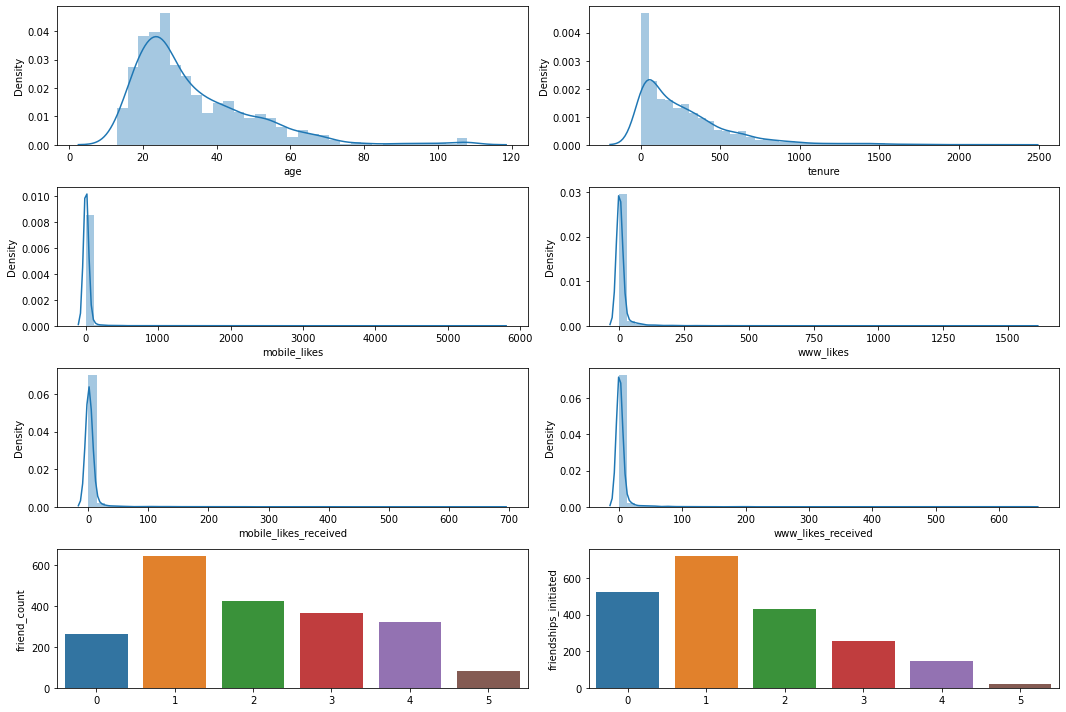

In [9]:
l=['age','tenure','mobile_likes','www_likes','mobile_likes_received','www_likes_received','friend_count','friendships_initiated']

plt.figure(figsize=(15,10))

for i in range(0,len(l)):
    
    
    
    if (df_likes[l[i]].nunique()<=10):
        plt.subplot(4,2,i+1)
        sns.barplot(y=df_likes[l[i]].value_counts(),x=df_likes[l[i]].value_counts().index)
    else:
        plt.subplot(4,2,i+1)
        sns.distplot(a=df_likes[l[i]])
    
plt.tight_layout()

plt.show()

In [10]:
df_likes.skew()

age                      1.630726
tenure                   2.038302
friend_count             0.339639
friendships_initiated    0.693967
likes                   24.947661
likes_received          18.409403
mobile_likes            28.551561
mobile_likes_received   18.557995
www_likes               16.933760
www_likes_received      17.051536
dtype: float64

**Inference:** from above we can see there is a considerable amount of skewness in columns like `age`,`tenure`,`mobile_likes`,`www_likes`,`mobile_likes_received`,`www_likes_received`.

#### b.

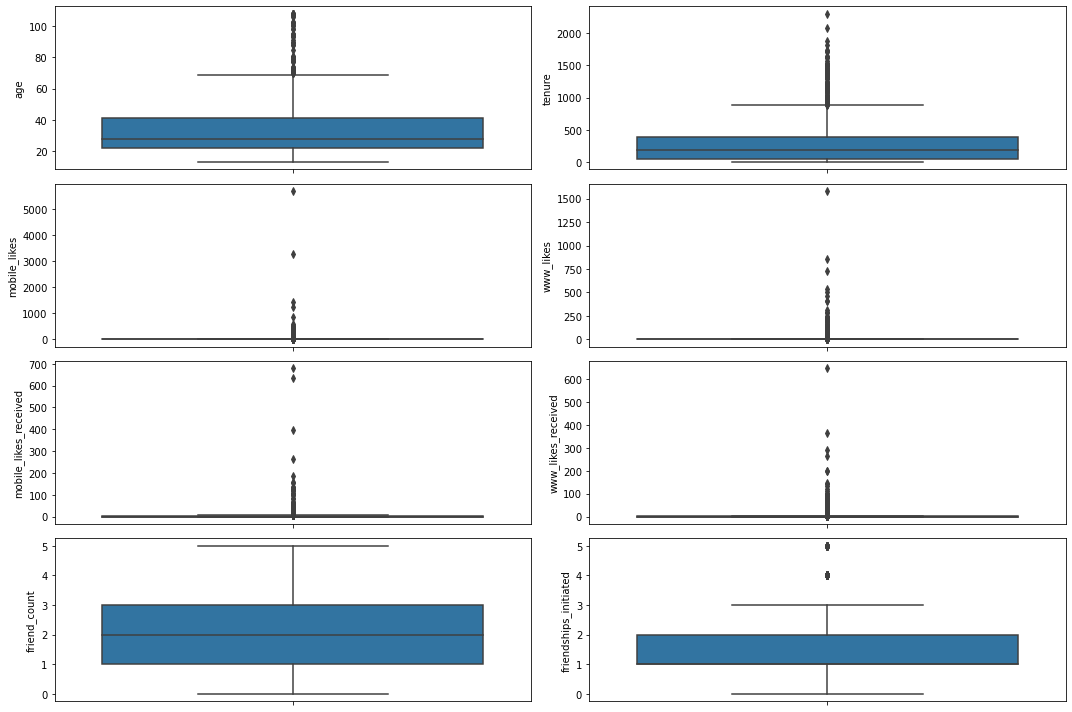

In [11]:
l=['age','tenure','mobile_likes','www_likes','mobile_likes_received','www_likes_received','friend_count','friendships_initiated']

plt.figure(figsize=(15,10))

for i in range(0,len(l)):
    plt.subplot(4,2,i+1)
    sns.boxplot(y=df_likes[l[i]])
    
plt.tight_layout()

plt.show()

**inference:** from above we can see there is a considerable number of outliers present in columns like `age`,`tenure`,`mobile_likes`,`www_likes`,`mobile_likes_received`,`www_likes_received`.

### 2.

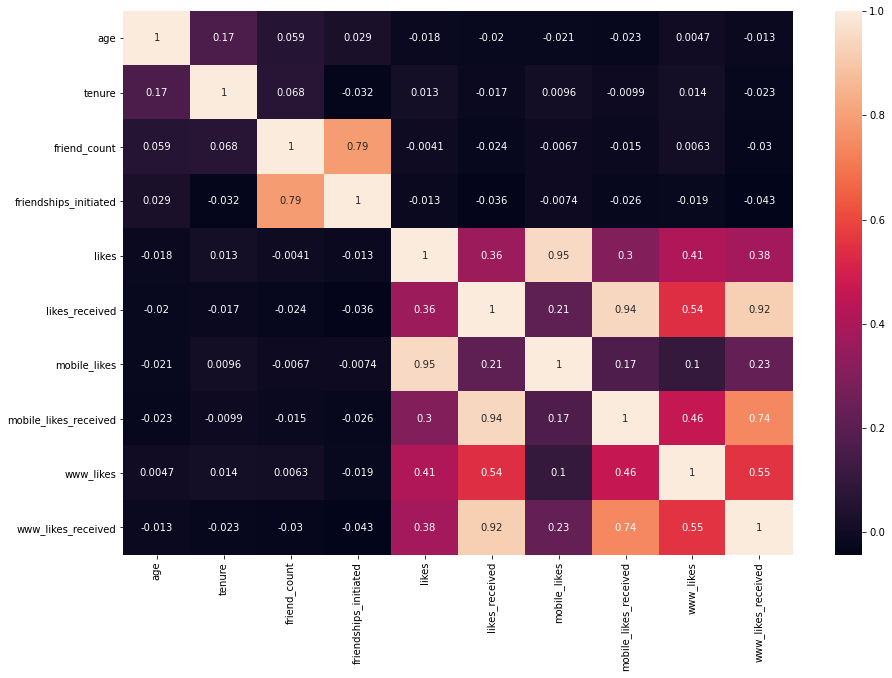

In [12]:
plt.figure(figsize=(15,10))

sns.heatmap(data=df_likes.corr(),annot=True)

plt.show()

**Inference:** 1) we see dependent variable `Likes` is highly correlated with `mobile_likes`, infact `Likes` column is summation of `mobile_likes` and `www_likes`. there is no point of construction regression model with these two variables present because it always gives R-square value as 1 and rmse as 0 for both test and train data.if we are getting dependent column by just addition of these two columns mentioned above, why there is a need to build a regression model, so we need to remove columns such as `mobile_likes` and `www_likes`.

2) we see independent variables such `likes_received` is highly correlated with `mobile_likes_received` and `www_likes_received`,infact `Likes_received` column is summation of `mobile_likes_received` and `www_likes_received`.
 so we remove columns `mobile_likes_received` and `www_likes_received`to aviod multi-collinearity.

In [13]:
df_likes.drop(['mobile_likes','www_likes','mobile_likes_received','www_likes_received'],axis=1,inplace=True)

In [14]:
# columns left are

df_likes.columns

Index(['age', 'gender', 'tenure', 'friend_count', 'friendships_initiated',
       'likes', 'likes_received'],
      dtype='object')

<h2 class="list-group-item list-group-item-action active" >3.Split dataset into train and test,Scaling    </h2>

>### 1. Split the dataset in dependent variable is [`likes`] and independent

>### 2. Convert categorical variables to numeric variables

>### 3. Scale the features 

>### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically? 
 

### 1.

In [15]:
# splitting the data into dependent and independent variables

df_features=df_likes.drop('likes',axis=1)

num_features=df_features.select_dtypes(include=[np.number])

cat=df_features.select_dtypes(include=[np.object])

df_target=pd.DataFrame(df_likes['likes'],columns=['likes'])

### 2.

In [16]:
# dummy encoding of categorical variable

cat=pd.get_dummies(data=cat,drop_first=True)

cat.reset_index(inplace=True,drop=True)

### 3.

In [17]:
# scaling the features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_features_scaled = pd.DataFrame(scaler.fit_transform(num_features), columns=num_features.columns)

num_features_scaled.reset_index(inplace=True,drop=True)

df_target_scaled= pd.DataFrame(scaler.fit_transform(df_target),columns =df_target.columns)

df_target_scaled.reset_index(inplace=True,drop=True)

### 4.

In [18]:
# concatenating numerical features and categorical ones

df_features1=pd.concat([num_features_scaled,cat],axis=1)

In [19]:
# splitting the data into train and test

X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(df_features1,df_target_scaled['likes'], 
                                                    random_state=10, test_size = 0.3)

# print dimension of train set
print('X_train_slr', X_train_slr.shape)
print('y_train_slr', y_train_slr.shape)

# print dimension of test set
print('X_test_slr', X_test_slr.shape)
print('y_test_slr', y_test_slr.shape)

X_train_slr (1471, 6)
y_train_slr (1471,)
X_test_slr (631, 6)
y_test_slr (631,)


<h2 class="list-group-item list-group-item-action active" >4.Model Building and Feature Selection using RFE(Recursive feature elimination)   </h2>

>### 1. Use Linear Regression

>### 2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

>### 3. Feature selection using RFE

Step1: Check the optimal number of features between 4 to 30

Step2: RFE with n features(LinearRegression) 

Step3: Specify the number of features

Step4: Fit with n features

Step5: Select features selected by rfe_n      

Step6:Training & test data for n selected columns        

Step7: Add a constant to the model       

Step8:Fit the ols model with n features

Step9: Calculate evaluation metrics

Step 10: Plot r2 and RMSE against n_features  

Step11: Write your final inference.    




>### 4. Model Bulding with optimal features count



### 1.

checking the assumptions before building model

In [20]:
# target variable should be continuous numerical variable

y_train_slr.dtype

dtype('float64')

In [21]:
# checking for multicollinearity

# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(num_features_scaled.values, i) for i in range(num_features_scaled.shape[1])]

# create a column of variable names
vif["Features"] = num_features_scaled.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,7.682986,friend_count
1,6.375010,friendships_initiated
2,2.078426,age
3,1.787268,tenure
4,1.021005,likes_received


**inference:** both the intial assumptions ,target column is continuous numerical variable and no multicollinearity are satisfied.

In [22]:
X_train_slr = sm.add_constant(X_train_slr)

X_test_slr = sm.add_constant(X_test_slr)


# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y_train_slr, X_train_slr).fit()

# print the summary output
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     36.20
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           4.81e-41
Time:                        21:12:09   Log-Likelihood:                 3057.2
No. Observations:                1471   AIC:                            -6100.
Df Residuals:                    1464   BIC:                            -6063.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

**inference:** The R-squared value obtained from this model is 0.129 which means that the above model explains a 12.9% of the variation in the `Likes`.

### 2.

In [23]:
train_pred = MLR_model.predict(X_train_slr)


test_pred = MLR_model.predict(X_test_slr)

In [24]:
# calculate the MSE using the "mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(y_train_slr, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)

# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test_slr, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.0303
Root Mean Squared Error (RMSE) on test set:  0.0146


**inference:**  rmse for train is more than test, which means model is underpredicting

### 3.

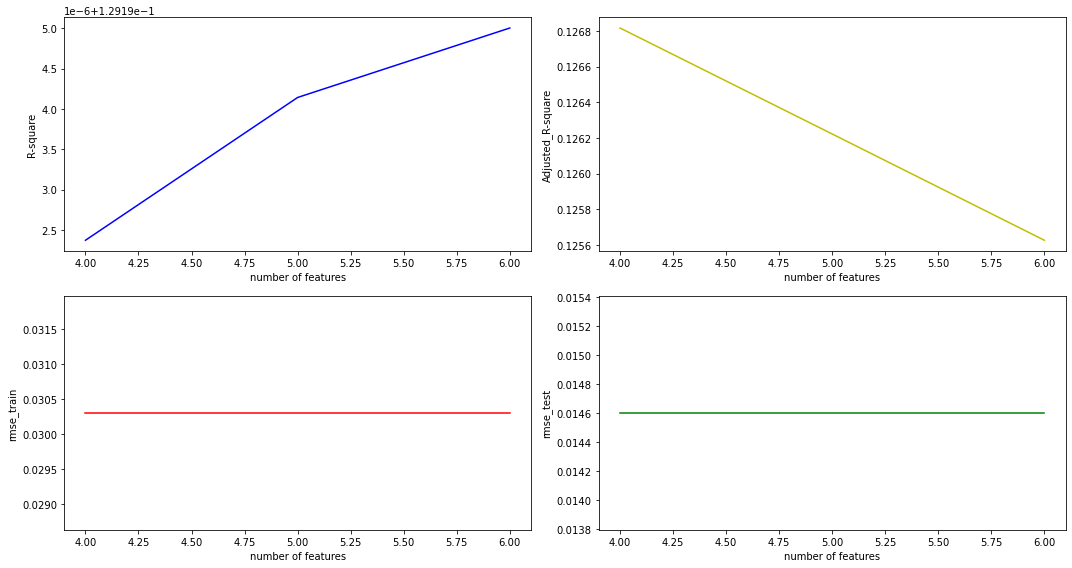

In [26]:
# checking for optimal number of features

plt.figure(figsize=[15,8])

X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(df_features1,df_target_scaled['likes'], 
                                                    random_state=10, test_size = 0.3)

r_square=[]

adj_r_square=[]

rmse_train_data=[]

rmse_test_data=[]

n_features=[]

for n1 in range(4,len(X_train_slr.columns)+1):
    # initiate linear regression model to use in feature selection
    linreg_rfe = LinearRegression()

    # build the RFE model
    # pass the regression model to 'estimator'
    # pass number of required features to 'n_features_to_select'
    # if we do not pass the number of features, RFE considers half of the features
    rfe_model = RFE(estimator=linreg_rfe,n_features_to_select=n1)

    # fit the RFE model on the training dataset using fit()
    rfe_model = rfe_model.fit(X_train_slr, y_train_slr)

    # create a series containing feature and its corresponding rank obtained from RFE
    # 'ranking_' returns the rank of each variable after applying RFE
    # pass the ranks as the 'data' of a series
    # 'index' assigns feature names as index of a series 
    feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_slr.columns)

    # select the features with rank = 1
    # 'index' returns the indices of a series (i.e. features with rank=1) 
    signi_feat_rfe = feat_index[feat_index==1].index

    
    X_train_slr1=X_train_slr[list( signi_feat_rfe)]
    
    y_train_slr1=y_train_slr
    
    X_test_slr1=X_test_slr[list( signi_feat_rfe)]
    
    y_test_slr1=y_test_slr
    
    X_train_slr1 = sm.add_constant(X_train_slr1)

    X_test_slr1 = sm.add_constant(X_test_slr1)


    # build a model on training dataset
    # fit() is used to fit the OLS model
    MLR_model1 = sm.OLS(y_train_slr1, X_train_slr1).fit()
    
    n_features.append(n1)
    
    r_square.append(MLR_model1.rsquared)
    
    adj_r_square.append(MLR_model1.rsquared_adj)
    
    train_pred1 = MLR_model1.predict(X_train_slr1)

    test_pred1 = MLR_model1.predict(X_test_slr1)
    
    mse_train1 = mean_squared_error(y_train_slr1, train_pred1)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train1 = round(np.sqrt(mse_train1), 4)

    # print the RMSE for the train set
    #print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
 
    # MSE for the test data
    mse_test1 = mean_squared_error(y_test_slr1, test_pred1)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test1 = round(np.sqrt(mse_test1), 4)
    
    rmse_train_data.append(rmse_train1)
    
    rmse_test_data.append(rmse_test1)

plt.subplot(2,2,1)
plt.plot(n_features,r_square,color='b')
plt.ylabel('R-square')
plt.xlabel('number of features')

plt.subplot(2,2,2)
plt.plot(n_features,adj_r_square,color='y')
plt.ylabel('Adjusted_R-square')
plt.xlabel('number of features')

plt.subplot(2,2,3)
plt.plot(n_features,rmse_train_data,color='r')
plt.ylabel('rmse_train')
plt.xlabel('number of features')

plt.subplot(2,2,4)
plt.plot(n_features,rmse_test_data,color='g')
plt.ylabel('rmse_test')
plt.xlabel('number of features')
plt.tight_layout()

plt.show()

**inference:** Since adjusted R-square is more for number of features=4, and rmse values remains same for different number of features, therefore we select optimal features as 4

In [27]:
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(df_features1,df_target_scaled['likes'], 
                                                    random_state=10, test_size = 0.3)

# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 4)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train_slr, y_train_slr)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_slr.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['age', 'tenure', 'likes_received', 'gender_male'], dtype='object')


In [28]:
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(df_features1[['age', 'tenure', 'likes_received', 'gender_male']],df_target_scaled['likes'], 
                                                    random_state=10, test_size = 0.3)

X_train_slr = sm.add_constant(X_train_slr)

X_test_slr = sm.add_constant(X_test_slr)


# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y_train_slr, X_train_slr).fit()

# print the summary output
print(MLR_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     54.37
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           8.79e-43
Time:                        21:19:55   Log-Likelihood:                 3057.2
No. Observations:                1471   AIC:                            -6104.
Df Residuals:                    1466   BIC:                            -6078.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0058      0.002      3.

**inference:** Again, the R-squared value obtained from this model is 0.129 which means that the above model explains a 12.9% of the variation in the `Likes`.

<h2 class="list-group-item list-group-item-action active" >5.Linear Regression Assumptions Validation</h2>


>### 1. Linearity of the model
>### 2. Homoscedasticity (equal variance) of residuals
>### 3. Normality of residuals 
>### 4. Identifying Outliers/influential Cases

### 1.

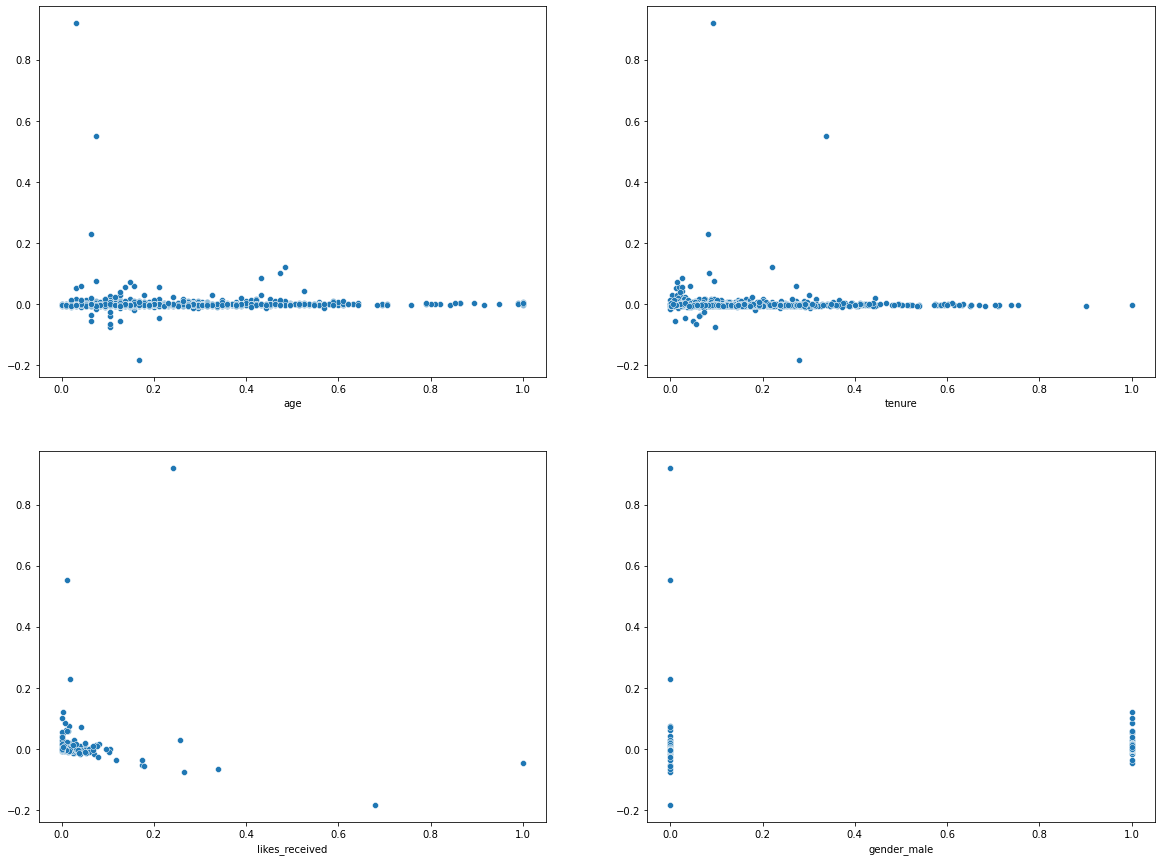

In [29]:
# checking linearity of the model

# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train_slr[['age', 'tenure', 'likes_received', 'gender_male']], ax.flatten()):
    sns.scatterplot(X_train_slr[variable], MLR_model.resid , ax=subplot)

# display the plot
plt.show()

**inference:** we see there is no proper pattern present between independent variables and residuals, therefore linearity assumption is satisfied.

### 2.

In [30]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(MLR_model.resid, MLR_model.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
lzip(name, test[2:])

[('f-value', 13.775165401731226), ('p-value', 4.949685085321627e-11)]

**Interpretation:** We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.

### 3.

In [31]:
# perform Shapiro Wilk test using 'shapiro()' from scipy library
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# 'resid' returns the residuals in the model
# pass the residuals to 'shapiro()'
stat, p_value = shapiro(MLR_model.resid)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.10728853940963745
P-Value: 0.0


**Interpretation:** From the above test we can see that the p-value is 0.0 (less than 0.05), thus we can say that the residuals are not normally distributed.

### 4.

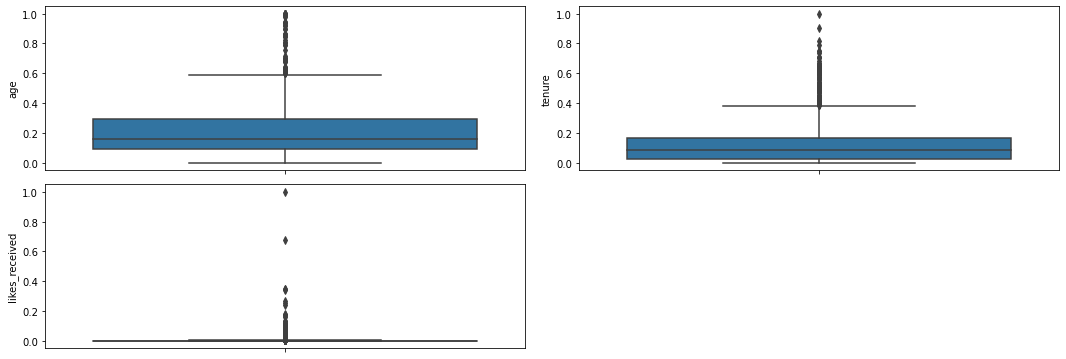

In [32]:
l=['age','tenure','likes_received']

plt.figure(figsize=(15,10))

for i in range(0,len(l)):
    plt.subplot(4,2,i+1)
    sns.boxplot(y=df_features1[l[i]])
    
plt.tight_layout()

plt.show()

In [33]:
# square root transformations

df_features2 =np.sqrt(df_features1)

df_target_scaled1=np.sqrt(df_target_scaled)

<h2 class="list-group-item list-group-item-action active" >6.Rebuilding the Model: Feature Selection using RFE & K-Fold Cross Validation</h2>


>### A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.

>### B. K-Fold Cross Validation

### A.

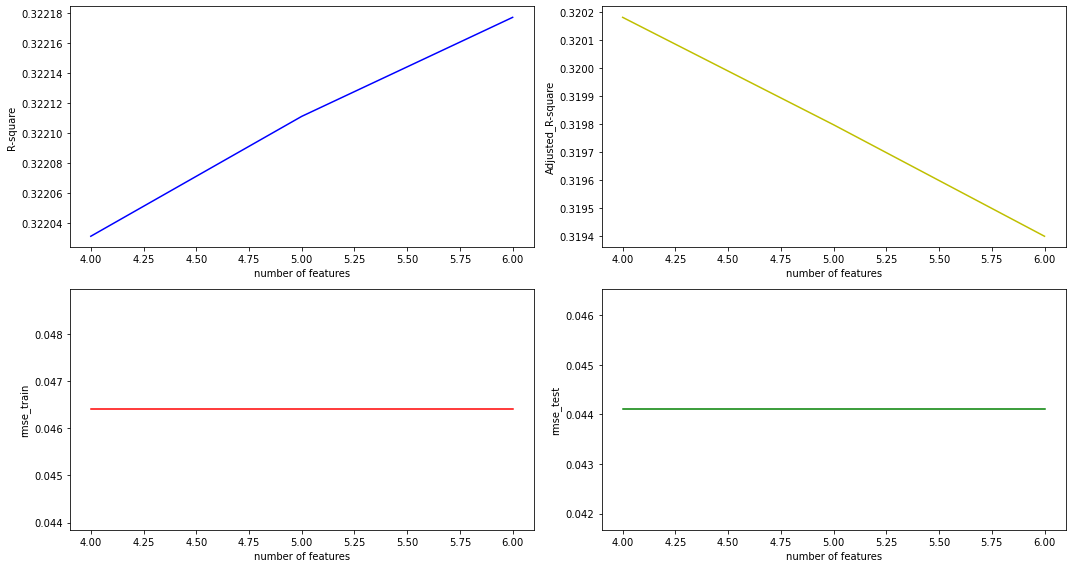

In [34]:
# checking for optimal number of features

plt.figure(figsize=[15,8])

X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(df_features2,df_target_scaled1['likes'], 
                                                    random_state=10, test_size = 0.3)

r_square=[]

adj_r_square=[]

rmse_train_data=[]

rmse_test_data=[]

n_features=[]

for n1 in range(4,len(X_train_slr.columns)+1):
    # initiate linear regression model to use in feature selection
    linreg_rfe = LinearRegression()

    # build the RFE model
    # pass the regression model to 'estimator'
    # pass number of required features to 'n_features_to_select'
    # if we do not pass the number of features, RFE considers half of the features
    rfe_model = RFE(estimator=linreg_rfe,n_features_to_select=n1)

    # fit the RFE model on the training dataset using fit()
    rfe_model = rfe_model.fit(X_train_slr, y_train_slr)

    # create a series containing feature and its corresponding rank obtained from RFE
    # 'ranking_' returns the rank of each variable after applying RFE
    # pass the ranks as the 'data' of a series
    # 'index' assigns feature names as index of a series 
    feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_slr.columns)

    # select the features with rank = 1
    # 'index' returns the indices of a series (i.e. features with rank=1) 
    signi_feat_rfe = feat_index[feat_index==1].index

    
    X_train_slr1=X_train_slr[list(signi_feat_rfe)]
    
    y_train_slr1=y_train_slr
    
    X_test_slr1=X_test_slr[list(signi_feat_rfe)]
    
    y_test_slr1=y_test_slr
    
    X_train_slr1 = sm.add_constant(X_train_slr1)

    X_test_slr1 = sm.add_constant(X_test_slr1)


    # build a model on training dataset
    # fit() is used to fit the OLS model
    MLR_model1 = sm.OLS(y_train_slr1, X_train_slr1).fit()
    
    n_features.append(n1)
    
    r_square.append(MLR_model1.rsquared)
    
    adj_r_square.append(MLR_model1.rsquared_adj)
    
    train_pred1 = MLR_model1.predict(X_train_slr1)

    test_pred1 = MLR_model1.predict(X_test_slr1)
    
    mse_train1 = mean_squared_error(y_train_slr1, train_pred1)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train1 = round(np.sqrt(mse_train1), 4)

    # print the RMSE for the train set
    #print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
 
    # MSE for the test data
    mse_test1 = mean_squared_error(y_test_slr1, test_pred1)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test1 = round(np.sqrt(mse_test1), 4)
    
    rmse_train_data.append(rmse_train1)
    
    rmse_test_data.append(rmse_test1)

plt.subplot(2,2,1)
plt.plot(n_features,r_square,color='b')
plt.ylabel('R-square')
plt.xlabel('number of features')

plt.subplot(2,2,2)
plt.plot(n_features,adj_r_square,color='y')
plt.ylabel('Adjusted_R-square')
plt.xlabel('number of features')

plt.subplot(2,2,3)
plt.plot(n_features,rmse_train_data,color='r')
plt.ylabel('rmse_train')
plt.xlabel('number of features')

plt.subplot(2,2,4)
plt.plot(n_features,rmse_test_data,color='g')
plt.ylabel('rmse_test')
plt.xlabel('number of features')
plt.tight_layout()

plt.show()

**inference:**  Since adjusted R-square is more for number of features=4, and rmse values remains same for different number of features, therefore we select optimal features as 4

In [35]:
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(df_features2,df_target_scaled1['likes'], 
                                                    random_state=10, test_size = 0.3)

# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 4)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train_slr, y_train_slr)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_slr.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['age', 'tenure', 'likes_received', 'gender_male'], dtype='object')


In [36]:
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(df_features2[['age', 'tenure', 'likes_received', 'gender_male']],df_target_scaled1['likes'], 
                                                    random_state=10, test_size = 0.3)

X_train_slr = sm.add_constant(X_train_slr)

X_test_slr = sm.add_constant(X_test_slr)


# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y_train_slr, X_train_slr).fit()

# print the summary output
print(MLR_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     174.1
Date:                Mon, 23 Aug 2021   Prob (F-statistic):          4.48e-122
Time:                        21:24:43   Log-Likelihood:                 2429.8
No. Observations:                1471   AIC:                            -4850.
Df Residuals:                    1466   BIC:                            -4823.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0215      0.004      5.

**inference:** Now after square root transformation , the R-squared value obtained from this model is 0.322 which means that the above model explains a 32.2% of the variation in the `Likes`. Before square root tansformation, model used to explain only 12.9% variation.

### B.

In [37]:
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(df_features2[['age', 'tenure', 'likes_received', 'gender_male']],df_target_scaled1['likes'], 
                                                    random_state=10, test_size = 0.3)




# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing linear regression
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'r2' for r-squared, 'neg_mean_squared_error' for mean squared error (negative)
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train_slr, 
                         y = y_train_slr, 
                         cv = 5, 
                         scoring = 'r2')

In [38]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.32518439 0.24805449 0.38360422 0.33639904 0.13304993]

Minimum score obtained:  0.133
Maximum score obtained:  0.3836
Average score obtained:  0.2853


**inference:** After square root transformation , avarage R-squared obtained from k-fold cross validation is 0.2853.